<a href="https://colab.research.google.com/github/Aaronau667/FinRL-Tutorials/blob/master/1-Introduction%20/Stock_NeurIPS2018/Stock_NeurIPS2018_1_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock NeurIPS2018 Part 1. Data
This series is a reproduction of paper *the process in the paper Practical Deep Reinforcement Learning Approach for Stock Trading*.

This is the first part of the NeurIPS2018 series, introducing how to use FinRL to fetch and process data that we need for ML/RL trading.

Other demos can be found at the repo of [FinRL-Tutorials]((https://github.com/AI4Finance-Foundation/FinRL-Tutorials)).

# Stock NeurIPS2018 Part 1. Data
This series is a reproduction of paper *the process in the paper Practical Deep Reinforcement Learning Approach for Stock Trading*.

This is the first part of the NeurIPS2018 series, introducing how to use FinRL to fetch and process data that we need for ML/RL trading.

Other demos can be found at the repo of [FinRL-Tutorials]((https://github.com/AI4Finance-Foundation/FinRL-Tutorials)).

# Stock NeurIPS2018 Part 1. Data
This series is a reproduction of paper *the process in the paper Practical Deep Reinforcement Learning Approach for Stock Trading*.

This is the first part of the NeurIPS2018 series, introducing how to use FinRL to fetch and process data that we need for ML/RL trading.

Other demos can be found at the repo of [FinRL-Tutorials]((https://github.com/AI4Finance-Foundation/FinRL-Tutorials)).

# Stock NeurIPS2018 Part 1. Data
This series is a reproduction of paper *the process in the paper Practical Deep Reinforcement Learning Approach for Stock Trading*.

This is the first part of the NeurIPS2018 series, introducing how to use FinRL to fetch and process data that we need for ML/RL trading.

Other demos can be found at the repo of [FinRL-Tutorials]((https://github.com/AI4Finance-Foundation/FinRL-Tutorials)).

# Part 1. Install Packages

In [ ]:
## install required packages
!pip install swig
!pip install wrds
!pip install pyportfolioopt
## install finrl library
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple
Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple
Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple
Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple
  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to c:\users\aaron_2\appdata\local\temp\pip-req-build-p5glycsg
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit 9175621d1235a335a667ee4796d7722e555a9e78
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to c:\users\aaron_2\appdata\local\temp\pip-install-sorksufy\elegantrl_80e2d8f

  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git 'C:\Users\Aaron_2\AppData\Local\Temp\pip-req-build-p5glycsg'
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git 'C:\Users\Aaron_2\AppData\Local\Temp\pip-install-sorksufy\elegantrl_80e2d8f3ddc743b383c88b0caf97c4c4'


In [ ]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl import config_tickers
from finrl.config import INDICATORS

import itertools

# Part 2. Fetch data

[yfinance](https://github.com/ranaroussi/yfinance) is an open-source library that provides APIs fetching historical data form Yahoo Finance. In FinRL, we have a class called [YahooDownloader](https://github.com/AI4Finance-Foundation/FinRL/blob/master/finrl/meta/preprocessor/yahoodownloader.py) that use yfinance to fetch data from Yahoo Finance.

**OHLCV**: Data downloaded are in the form of OHLCV, corresponding to **open, high, low, close, volume,** respectively. OHLCV is important because they contain most of numerical information of a stock in time series. From OHLCV, traders can get further judgement and prediction like the momentum, people's interest, market trends, etc.

## Data for a single ticker

Here we provide two ways to fetch data with single ticker, let's take Apple Inc. (AAPL) as an example.

### Using yfinance

In [ ]:
aapl_df_yf = yf.download(tickers = "aapl", start='2020-01-01', end='2020-01-31')

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True


In [ ]:
aapl_df_yf.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200


### Using FinRL

In FinRL's YahooDownloader, we modified the data frame to the form that convenient for further data processing process. We use adjusted close price instead of close price, and add a column representing the day of a week (0-4 corresponding to Monday-Friday).

In [ ]:
aapl_df_finrl = YahooDownloader(start_date = '2020-01-01',
                                end_date = '2020-01-31',
                                ticker_list = ['aapl']).fetch_data()

[*********************100%***********************]  1 of 1 completed

YF deprecation warning: set proxy via new config function: yf.set_config(proxy=proxy)
Shape of DataFrame:  (20, 8)


In [ ]:
aapl_df_finrl.head()

Price,date,close,high,low,open,volume,tic,day
0,2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400,aapl,3
1,2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800,aapl,4
2,2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200,aapl,0
3,2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000,aapl,1
4,2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200,aapl,2


## Data for the chosen tickers

In [ ]:
config_tickers.DOW_30_TICKER

['AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CSCO',
 'CVX',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'KO',
 'JPM',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'CRM',
 'VZ',
 'V',
 'WBA',
 'WMT',
 'DIS',
 'DOW']

In [ ]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2020-07-01'
TRADE_START_DATE = '2020-07-01'
TRADE_END_DATE = '2021-10-29'

In [ ]:
df_raw = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (94301, 8)


In [ ]:
df_raw.head()

Price,date,close,high,low,open,volume,tic,day
0,2009-01-02,2.727417,2.736133,2.559415,2.581053,746015200,AAPL,4
1,2009-01-02,40.791439,40.853674,39.933981,40.514839,6547900,AMGN,4
2,2009-01-02,14.929296,15.076040,14.211021,14.342318,10955700,AXP,4
3,2009-01-02,33.941097,34.173623,32.088400,32.103402,7010200,BA,4
4,2009-01-02,30.344683,30.389963,28.921568,29.050942,7117200,CAT,4


# Part 3: Preprocess Data
We need to check for missing data and do feature engineering to convert the data point into a state.
* **Adding technical indicators**. In practical trading, various information needs to be taken into account, such as historical prices, current holding shares, technical indicators, etc. Here, we demonstrate two trend-following technical indicators: MACD and RSI.
* **Adding turbulence index**. Risk-aversion reflects whether an investor prefers to protect the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the turbulence index that measures extreme fluctuation of asset price.

Hear let's take **MACD** as an example. Moving average convergence/divergence (MACD) is one of the most commonly used indicator showing bull and bear market. Its calculation is based on EMA (Exponential Moving Average indicator, measuring trend direction over a period of time.)

In [ ]:
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_vix=True,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df_raw)

[*********************100%***********************]  1 of 1 completed

Successfully added technical indicators
Shape of DataFrame:  (3228, 8)
Successfully added vix
Successfully added turbulence index


In [ ]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [ ]:
processed_full.head()

,date,tic,close,high,low,open,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2009-01-02,AAPL,2.727417,2.736133,2.559415,2.581053,746015200.0,4.0,0.0,2.947758,2.622184,100.0,66.666667,100.0,2.727417,2.727417,39.189999,0.0
1,2009-01-02,AMGN,40.791439,40.853674,39.933981,40.514839,6547900.0,4.0,0.0,2.947758,2.622184,100.0,66.666667,100.0,40.791439,40.791439,39.189999,0.0
2,2009-01-02,AXP,14.929296,15.076040,14.211021,14.342318,10955700.0,4.0,0.0,2.947758,2.622184,100.0,66.666667,100.0,14.929296,14.929296,39.189999,0.0
3,2009-01-02,BA,33.941097,34.173623,32.088400,32.103402,7010200.0,4.0,0.0,2.947758,2.622184,100.0,66.666667,100.0,33.941097,33.941097,39.189999,0.0
4,2009-01-02,CAT,30.344683,30.389963,28.921568,29.050942,7117200.0,4.0,0.0,2.947758,2.622184,100.0,66.666667,100.0,30.344683,30.344683,39.189999,0.0


# Part 4: Save the Data

### Split the data for training and trading

In [ ]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

83897
9715


### Save data to csv file

For Colab users, you can open the virtual directory in colab and manually download the files.

For users running on your local environment, the csv files should be at the same directory of this notebook.

In [ ]:
train.to_csv('train_data.csv')
trade.to_csv('trade_data.csv')

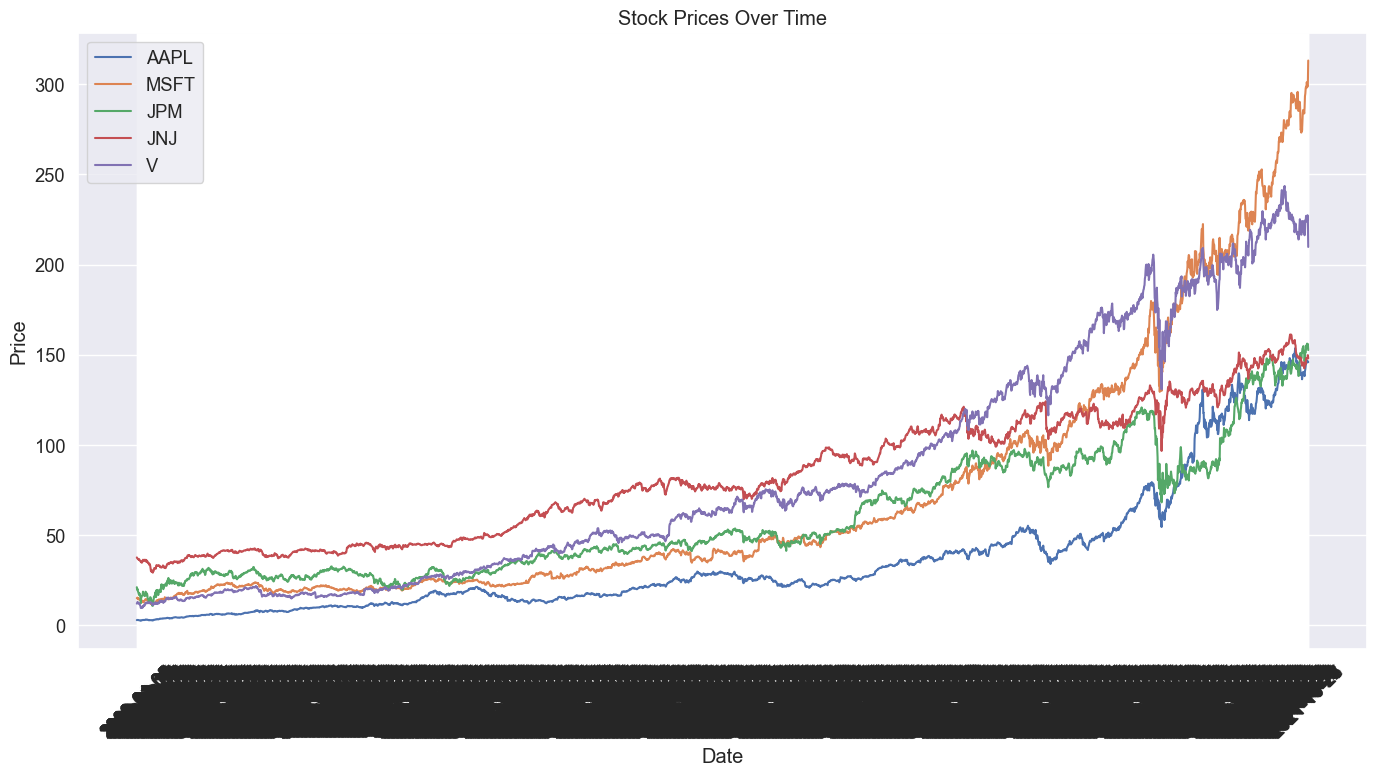

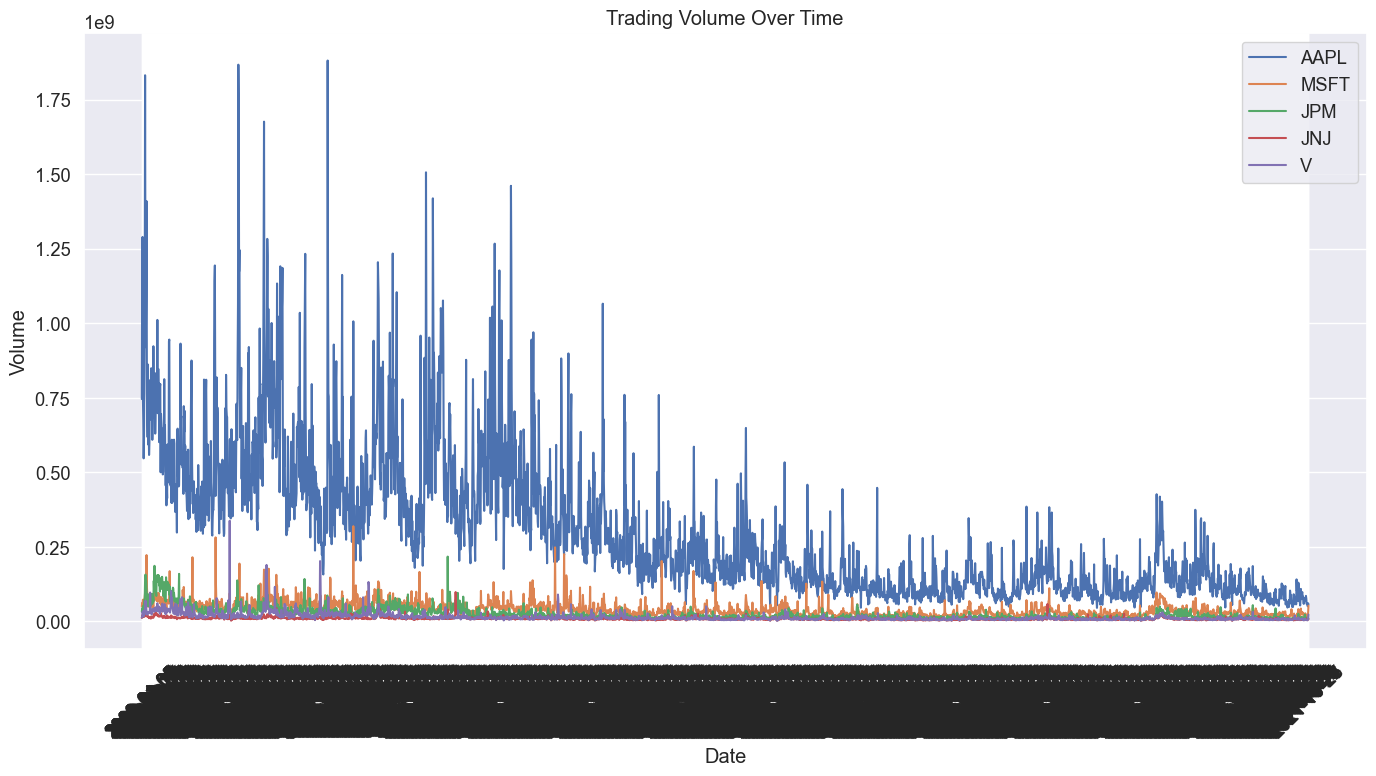

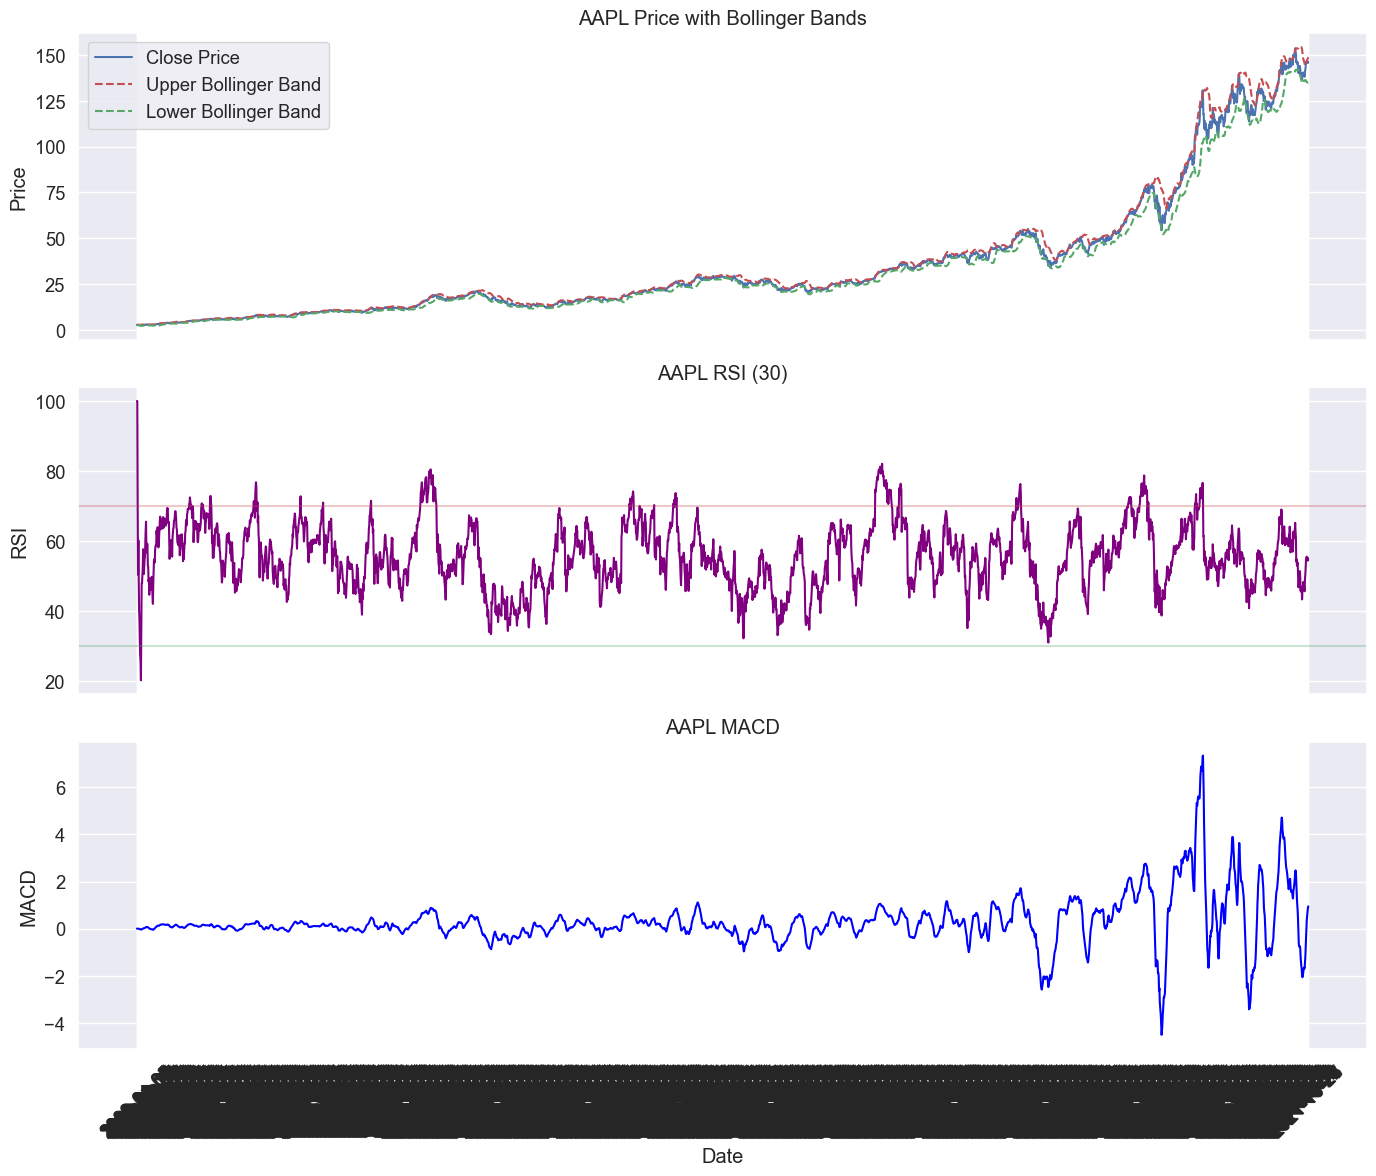

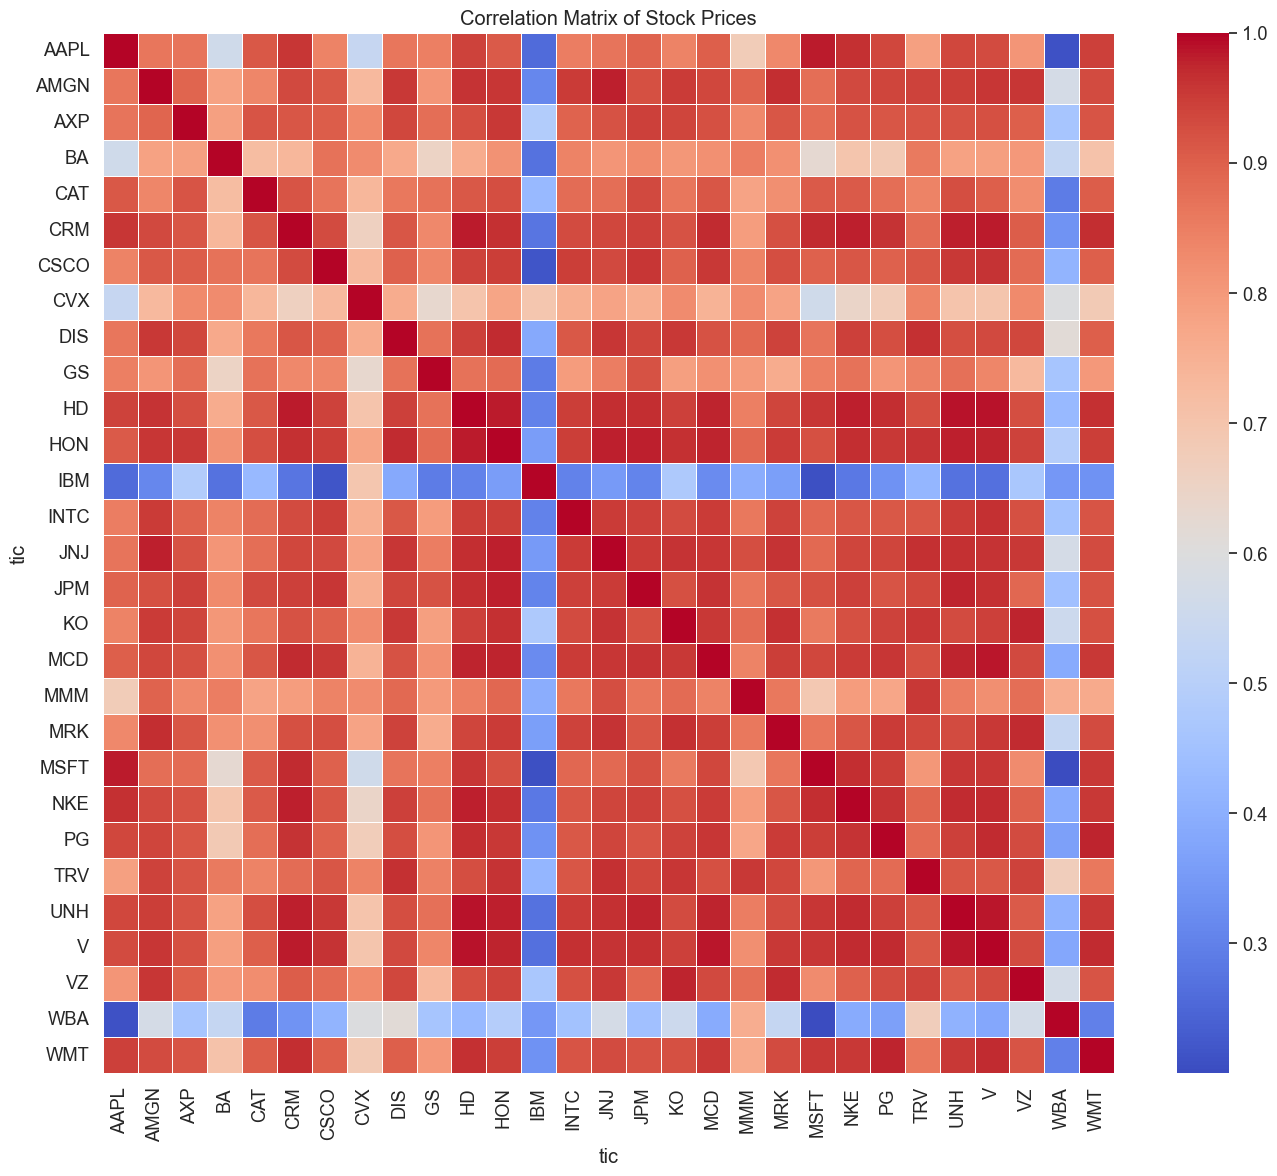

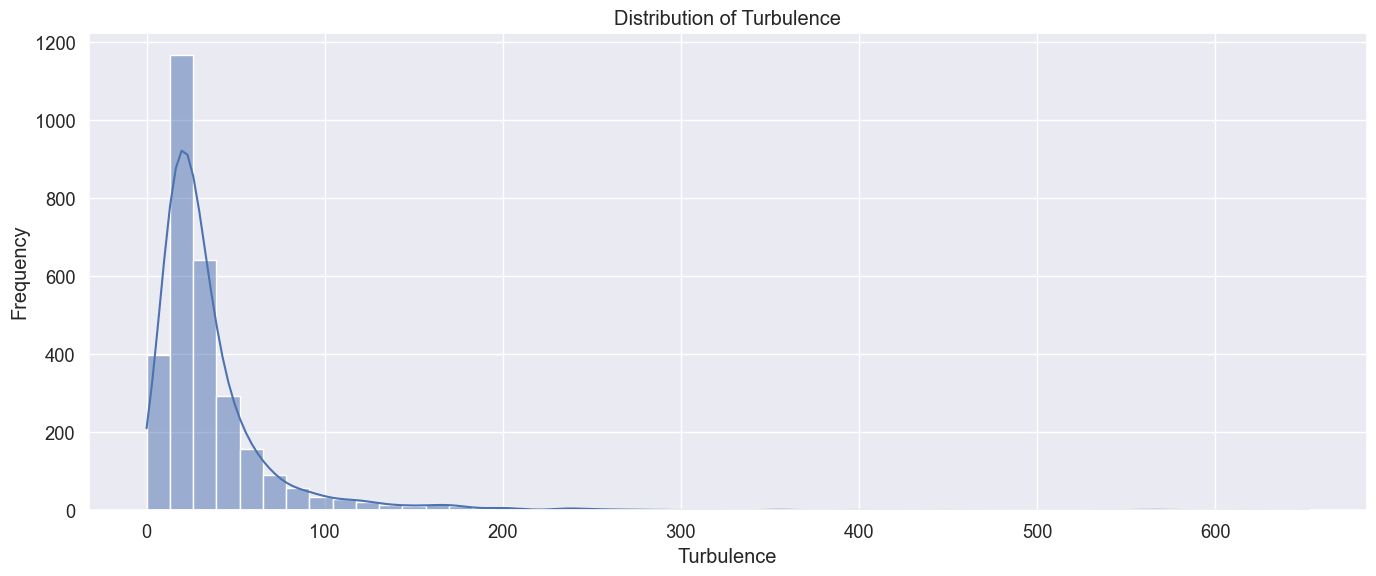

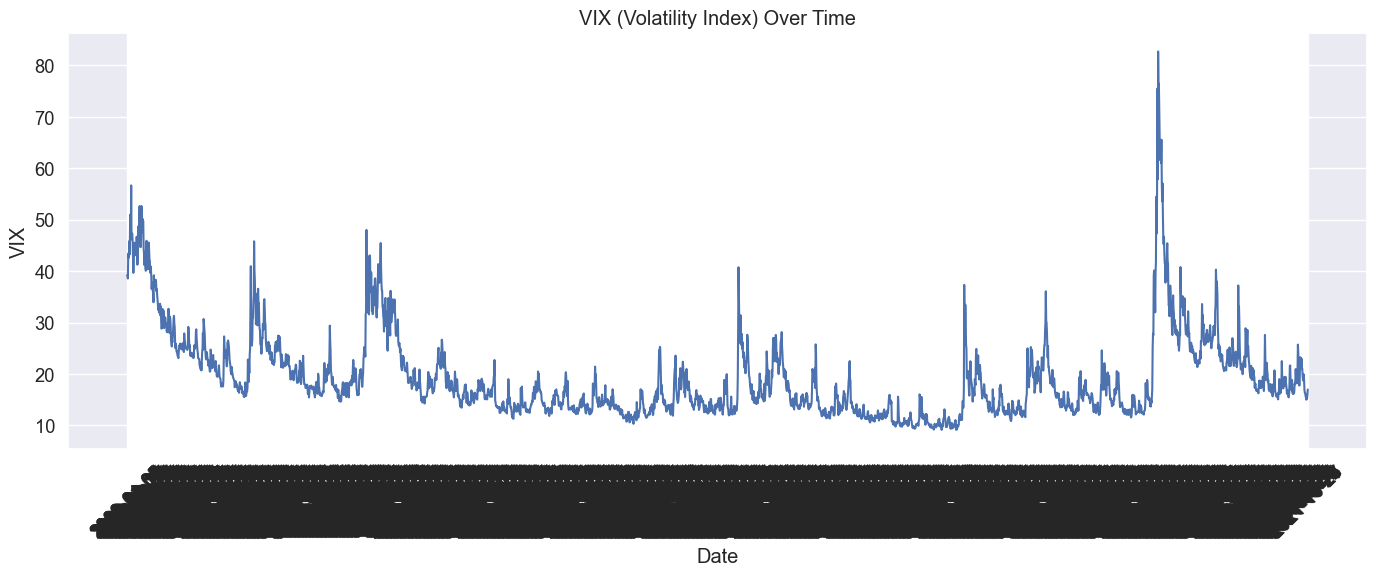

In [ ]:

%matplotlib inline

# %% cell 33 markdown

# # Part 5: Visualize the Data

# %% cell 34 code

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# %% cell 35 code

# Visualize stock prices for a few selected stocks
selected_tickers = ['AAPL', 'MSFT', 'JPM', 'JNJ', 'V']
plt.figure(figsize=(14, 8))

for ticker in selected_tickers:
    ticker_data = processed_full[processed_full['tic'] == ticker]
    plt.plot(ticker_data['date'], ticker_data['close'], label=ticker)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# %% cell 36 code

# Visualize trading volume for selected stocks
plt.figure(figsize=(14, 8))

for ticker in selected_tickers:
    ticker_data = processed_full[processed_full['tic'] == ticker]
    plt.plot(ticker_data['date'], ticker_data['volume'], label=ticker)

plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# %% cell 37 code

# Visualize technical indicators for a specific stock (e.g., AAPL)
ticker = 'AAPL'
ticker_data = processed_full[processed_full['tic'] == ticker]

fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot stock price with Bollinger Bands
axes[0].plot(ticker_data['date'], ticker_data['close'], label='Close Price')
axes[0].plot(ticker_data['date'], ticker_data['boll_ub'], 'r--', label='Upper Bollinger Band')
axes[0].plot(ticker_data['date'], ticker_data['boll_lb'], 'g--', label='Lower Bollinger Band')
axes[0].set_title(f'{ticker} Price with Bollinger Bands')
axes[0].set_ylabel('Price')
axes[0].legend()

# Plot RSI
axes[1].plot(ticker_data['date'], ticker_data['rsi_30'], 'purple')
axes[1].axhline(y=70, color='r', linestyle='-', alpha=0.3)
axes[1].axhline(y=30, color='g', linestyle='-', alpha=0.3)
axes[1].set_title(f'{ticker} RSI (30)')
axes[1].set_ylabel('RSI')

# Plot MACD
axes[2].plot(ticker_data['date'], ticker_data['macd'], 'blue')
axes[2].set_title(f'{ticker} MACD')
axes[2].set_ylabel('MACD')
axes[2].set_xlabel('Date')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# %% cell 38 code

# Correlation heatmap of stock prices
# First, pivot the data to get a wide format with tickers as columns
pivot_data = processed_full.pivot(index='date', columns='tic', values='close')

# Calculate correlation matrix
corr_matrix = pivot_data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Prices')
plt.tight_layout()
plt.show()

# %% cell 39 code

# Visualize the distribution of turbulence
plt.figure(figsize=(14, 6))
sns.histplot(processed_full['turbulence'].unique(), bins=50, kde=True)
plt.title('Distribution of Turbulence')
plt.xlabel('Turbulence')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# %% cell 40 code

# Visualize VIX over time
vix_data = processed_full[['date', 'vix']].drop_duplicates()
plt.figure(figsize=(14, 6))
plt.plot(vix_data['date'], vix_data['vix'])
plt.title('VIX (Volatility Index) Over Time')
plt.xlabel('Date')
plt.ylabel('VIX')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
